# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b> Regularization (Ridge, Lasso, ElasticNet) </b></p>

# Import Libraries and Load Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import get_scorer_names
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
# pip install yellowbrick
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
from sklearn.linear_model import ElasticNet

# Set plotting aesthetics

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df.drop("sales", axis= 1)
y = df["sales"]

# Data Preprocessing

## Polynomial Conversion

In [5]:
polynomial_converter = PolynomialFeatures(degree = 5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [6]:
poly_features.shape

(200, 55)

## Train | Test Split

**Scikit-Learn**'s `train_test_split` function is used to split the data into training and testing sets during the process of developing machine learning models. This function separates the data used for training the model from the data used to evaluate the model's performance, allowing us to better assess the model's accuracy and generalization ability.

**Functions and Classes in the `sklearn.model_selection` Module**

1. **Functions**

- **cross_val_score**: Evaluates the performance of a model using cross-validation.
- **cross_val_predict**: Returns predictions from cross-validation.
- **cross_validate**: Evaluates multiple metrics and records fit/score times.
- **train_test_split**: Splits the data into training and test sets.
- **validation_curve**: Plots curves that show the performance of a model with respect to its hyperparameters.
- **learning_curve**: Plots curves showing the model's performance with increasing training examples.
- **permutation_test_score**: Returns cross-validation scores using random labeling.
- **KFold**: K-fold cross-validation splitter.
- **StratifiedKFold**: Stratified K-fold cross-validation splitter.
- **GroupKFold**: K-fold cross-validation splitter based on groups.
- **LeaveOneOut**: Leave-One-Out cross-validation.
- **LeavePOut**: Leave-P-Out cross-validation.
- **ShuffleSplit**: Randomized data splitting.
- **StratifiedShuffleSplit**: Stratified random data splitting.
- **GroupShuffleSplit**: Random data splitting based on groups.
- **GridSearchCV**: Performs hyperparameter tuning with cross-validation.
- **RandomizedSearchCV**: Performs random hyperparameter search with cross-validation.
- **PredefinedSplit**: Predefined data splitting.
- **TimeSeriesSplit**: Splits time series data.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Scaling

**Scaling: Standardizing Feature Ranges**

Scaling refers to standardizing the ranges of features in a dataset, which is particularly important for machine learning models. Some models are sensitive to features with varying ranges. For example, **distance-based models** like **k-Nearest Neighbors (k-NN)** or **K-means** require scaling. Additionally, scaling helps models that use gradient descent, such as **linear regression**, to converge faster and more stably.

**Advantages of Scaling:**

1. **Prevents incorrect weighting:** Particularly in distance-based models, scaling prevents features with larger ranges from dominating those with smaller ranges.
2. **Speeds up gradient descent:** Scaling allows models using gradient descent, like **linear regression** and **logistic regression**, to converge faster and more reliably.
3. **Enhances feature importance detection:** Scaling helps models that assess **feature importance** to yield more balanced results.

> There are no disadvantages to applying scaling to your data. If you're unsure whether to scale, it’s usually best to apply it directly.

**Common Scaling Techniques:**

1. **StandardScaler:** Scales data so that the mean is zero and the standard deviation is one.
   ```python
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   X_test_scaled = scaler.transform(X_test)  # Only fit() on the training set
   ```
2. **MinMaxScaler:** Scales data to a specified range (e.g., 0-1).
   ```python
   from sklearn.preprocessing import MinMaxScaler
   scaler = MinMaxScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   X_test_scaled = scaler.transform(X_test)
   ```

**Data Leakage: Preventing Information Leakage Between Training and Test Sets**

Data leakage occurs when information from the test set unintentionally influences the training set, leading to overly optimistic performance estimates. Scaling or transformations are common sources of data leakage.

**Preventing Data Leakage:**
1. **Apply fit only on the training set:** The **fit** operation learns the distribution from the data. Therefore, it should be applied only to **X_train**.
2. **Apply transform on both training and test sets:** The **transform** method applies the scaling learned from **fit** to both the training and test sets. However, if **fit** is applied to the test set, it leads to data leakage.

**Why Do We Only Perform the Fit Process on X_train?**

- **Data Leakage**: If the fit process is performed on the entire dataset, the model will have seen the test data, leading to data leakage. This would result in an unrealistically high model performance.
- **Correct Value Transformation**: The fit process is performed only on **X_train**, and the mean and standard deviation values obtained are used to transform both the training and test data. This ensures that the training and test data are transformed according to the same scaling criteria, preventing data leakage.

> **Example:**
   ```python
   # Apply fit only to the training set
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   
   # Apply transform to the test set using the fitted scaler
   X_test_scaled = scaler.transform(X_test)
   ```

> **Never scale or transform the target variable.** Transforming the target variable can disrupt the model’s purpose and lead to misleading results.

---

**Summary**
- **Scaling** ensures that features contribute equally to the model by bringing them to a common scale.
- **Data leakage** is a critical issue to avoid by applying **fit** only to the training set and never to the test set.

Preprocessing steps like **standardization** and **normalization** help scale the data to a certain range. These steps are commonly used when training machine learning models to avoid situations where the distribution and scale of the data could affect the model's performance.

**Standardization**

**Standardization** scales the **features** of a dataset so that they have a mean of 0 and a standard deviation of 1. This is typically done by subtracting the mean of the feature and dividing by the standard deviation. This process makes the data closer to a normal distribution. Standardization corrects the scale differences between features, which can improve the performance of algorithms such as **Linear Regression**, **Logistic Regression**, **Support Vector Machines**, and **Neural Networks**.

In standardization, we express our data in terms of **z-scores**. After this, the mean of all features will be 0 and the standard deviation will be 1. The z-score indicates how far a data point is from the mean in terms of standard deviations. The mathematical operation of the mean and standard deviation allows the z-score to take on positive or negative values. Each number on the horizontal axis corresponds to a z-score, which shows how many standard deviations an observation is from the mean (μ).

**Normalization**

**Normalization** scales the **features** of a dataset to a range between 0 and 1. This is usually done by subtracting the minimum value of the feature from the feature value and then dividing the result by the range (maximum value minus minimum value). Normalization ensures that the data fits within a specific range and is often useful for algorithms like **k-NN**, **K-Means**, and **Neural Networks**, as these algorithms are sensitive to the scales of the features.

Normalization is a commonly used step in data preparation for machine learning projects. The goal of normalization is to convert the values of numerical variables in the dataset to a common scale without distorting differences in the ranges of values. Not every dataset requires normalization; it is only necessary when there are numerical variables that are distributed over different ranges.

For example, consider a dataset with two features, **age (x1)** and **income (x2)**. Age ranges from 0–100, while income ranges from 20,000–500,000. These two features have very different ranges. When performing an analysis like **Multivariate Linear Regression**, the income variable will have a greater impact on the result due to its larger value. However, this does not mean that the income variable is a more important predictor. To prevent this, normalization is needed.

Both techniques have their applications and algorithms, and which technique to use in a given situation typically depends on the requirements of the algorithm and the distribution of the data. For example, when the data does not follow a normal distribution, normalization is often a better choice. On the other hand, when the data is close to a normal distribution, standardization is usually preferred.

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)
#scaler.fit_transform(X_train) 
# The fit operation is applied only to the train set, and based on the information in the train set, transformation is then applied to both the train and test sets.

# Important: We apply scaling to X_train first, then apply it to the test set separately.
# If we scale the entire dataset at once, it will cause data leakage.

StandardScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)

In [13]:
X_train_scaled

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [14]:
X_test_scaled = scaler.transform(X_test)

In [15]:
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [16]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000
std,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004


In [17]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.183,-0.033,-0.086,-0.150,-0.151,-0.215,-0.023,-0.008,-0.038,-0.126,-0.116,-0.222,-0.093,-0.135,-0.177,-0.004,0.024,0.016,0.001,-0.108,-0.081,-0.219,-0.072,-0.152,-0.199,-0.053,-0.079,-0.116,-0.146,0.017,0.053,0.036,0.041,0.049,-0.096,-0.059,-0.215,-0.048,-0.155,-0.201,-0.040,-0.105,-0.146,-0.176,-0.021,-0.033,-0.079,-0.101,-0.115,0.037,0.079,0.055,0.050,0.080,0.108
std,1.051,1.023,1.055,1.009,1.045,0.756,1.057,1.074,1.130,0.982,1.047,0.649,1.058,0.844,0.613,1.090,1.106,1.149,1.378,0.961,1.030,0.568,1.069,0.724,0.461,1.093,0.935,0.684,0.555,1.124,1.147,1.127,1.390,1.736,0.941,1.008,0.507,1.065,0.634,0.376,1.118,0.815,0.517,0.332,1.135,1.036,0.759,0.603,0.566,1.159,1.193,1.111,1.308,1.749,2.159


# Linear Regression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [23]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


## Multicolineratiy


**Multicollinearity** occurs when independent variables (features) in a regression model are highly linearly related. This can create significant issues in regression analysis and reduce the reliability of the model. When multicollinearity is present, it becomes difficult to distinguish the effects of individual independent variables, and the predictive performance of the model may suffer.

**Causes**:
- Presence of highly similar independent variables in the dataset.
- Including a large number of independent variables in the model.
- Seasonal or trend components in time series data.

**Effects**:
- Regression coefficients become unreliable.
- The model's ability to generalize decreases.
- Standard errors increase, and confidence intervals widen.

**Indicators**:
- High correlation coefficients between independent variables.
- High VIF (Variance Inflation Factor) values (typically above 10).
- High R-squared value but high p-values for individual independent variables.

**Solutions**:
1. **Removing Variables**: Eliminate some of the highly correlated variables from the model.
2. **Principal Component Analysis (PCA)**: Reduce the data to fewer, independent components.
3. **Ridge or Lasso Regression**: Use penalization methods in regression models to reduce multicollinearity.

In [24]:
# Selecting only numeric columns and creating the correlation matrix
correlation_matrix = pd.DataFrame(poly_features).corr()

# Correlation matrix coloring function
def color_corr(val):
    """
    Function to color cells based on correlation values
    """
    color = ''
    if abs(val) == 1:
        color = 'background-color: #FF6666'  # Red for perfect correlation
    elif 0.7 <= abs(val) < 1:
        color = 'background-color: #FFB266'  # Orange for high correlation
    elif 0.3 <= abs(val) < 0.7:
        color = 'background-color: #FFFF66'  # Yellow for moderate correlation
    elif 0.1 <= abs(val) < 0.3:
        color = 'background-color: #66FF66'  # Green for low correlation
    elif abs(val) == 0:
        color = 'background-color: #FFFFFF'  # White for no correlation
    return color

# Applying the style and displaying the correlation matrix
styled_corr_matrix = correlation_matrix.style.applymap(color_corr)
styled_corr_matrix = styled_corr_matrix.format(precision=2)  # Numeric formatting (2 decimal places)
styled_corr_matrix.set_caption("Correlation Matrix ")
styled_corr_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.00,0.05,0.06,0.97,0.66,0.60,0.05,0.05,0.06,0.91,0.72,0.65,0.52,0.47,0.42,0.05,0.04,0.03,0.04,0.86,0.71,0.63,0.58,0.52,0.46,0.44,0.41,0.36,0.32,0.05,0.03,0.02,0.01,0.02,0.80,0.68,0.60,0.59,0.51,0.45,0.51,0.46,0.40,0.35,0.38,0.37,0.34,0.29,0.24,0.05,0.03,0.01,-0.00,-0.01,0.00
1,0.05,1.00,0.35,0.08,0.68,0.25,0.97,0.71,0.35,0.09,0.55,0.22,0.74,0.55,0.26,0.91,0.74,0.54,0.30,0.08,0.47,0.20,0.62,0.45,0.22,0.73,0.60,0.44,0.22,0.86,0.73,0.58,0.41,0.23,0.08,0.42,0.19,0.54,0.39,0.20,0.62,0.49,0.35,0.18,0.70,0.60,0.48,0.34,0.18,0.81,0.71,0.59,0.44,0.30,0.18
2,0.06,0.35,1.00,0.08,0.25,0.71,0.36,0.85,0.94,0.09,0.22,0.59,0.28,0.65,0.74,0.35,0.76,0.85,0.82,0.09,0.22,0.52,0.25,0.55,0.62,0.27,0.60,0.68,0.68,0.33,0.69,0.79,0.77,0.70,0.10,0.21,0.48,0.24,0.49,0.55,0.25,0.51,0.56,0.56,0.25,0.55,0.64,0.63,0.61,0.31,0.63,0.74,0.74,0.66,0.60
3,0.97,0.08,0.08,1.00,0.66,0.60,0.07,0.08,0.09,0.98,0.75,0.69,0.52,0.48,0.44,0.07,0.07,0.07,0.07,0.95,0.77,0.69,0.62,0.56,0.50,0.44,0.43,0.40,0.35,0.06,0.06,0.06,0.05,0.05,0.91,0.76,0.68,0.64,0.57,0.51,0.53,0.51,0.45,0.39,0.39,0.39,0.38,0.32,0.28,0.06,0.06,0.05,0.04,0.03,0.03
4,0.66,0.68,0.25,0.66,1.00,0.59,0.66,0.49,0.24,0.63,0.97,0.61,0.96,0.78,0.49,0.63,0.50,0.36,0.19,0.59,0.91,0.60,0.95,0.76,0.50,0.91,0.78,0.62,0.39,0.60,0.49,0.37,0.25,0.14,0.56,0.85,0.57,0.91,0.72,0.49,0.91,0.77,0.61,0.40,0.85,0.77,0.65,0.48,0.31,0.57,0.47,0.37,0.26,0.17,0.10
5,0.60,0.25,0.71,0.60,0.59,1.00,0.25,0.58,0.66,0.59,0.63,0.97,0.54,0.87,0.94,0.24,0.50,0.56,0.56,0.56,0.63,0.92,0.58,0.86,0.91,0.49,0.79,0.85,0.83,0.22,0.45,0.50,0.48,0.46,0.54,0.62,0.87,0.59,0.83,0.86,0.54,0.79,0.83,0.80,0.44,0.72,0.80,0.76,0.71,0.21,0.40,0.46,0.45,0.40,0.37
6,0.05,0.97,0.36,0.07,0.66,0.25,1.00,0.72,0.36,0.08,0.54,0.22,0.77,0.55,0.26,0.99,0.78,0.55,0.30,0.08,0.47,0.21,0.64,0.45,0.22,0.79,0.63,0.44,0.22,0.96,0.80,0.61,0.41,0.23,0.08,0.41,0.20,0.56,0.39,0.20,0.67,0.52,0.36,0.18,0.78,0.66,0.50,0.33,0.17,0.92,0.79,0.65,0.47,0.30,0.18
7,0.05,0.71,0.85,0.08,0.49,0.58,0.72,1.00,0.83,0.10,0.41,0.49,0.54,0.76,0.62,0.70,0.98,0.94,0.74,0.11,0.38,0.45,0.47,0.63,0.52,0.54,0.76,0.74,0.57,0.66,0.94,0.94,0.82,0.64,0.12,0.36,0.42,0.44,0.57,0.47,0.47,0.65,0.61,0.47,0.52,0.74,0.75,0.66,0.51,0.63,0.89,0.93,0.84,0.69,0.54
8,0.06,0.35,0.94,0.09,0.24,0.66,0.36,0.83,1.00,0.10,0.22,0.56,0.26,0.62,0.78,0.34,0.75,0.93,0.96,0.12,0.22,0.51,0.24,0.53,0.65,0.25,0.57,0.72,0.78,0.32,0.68,0.87,0.91,0.88,0.13,0.23,0.49,0.24,0.49,0.59,0.23,0.50,0.60,0.64,0.23,0.52,0.68,0.73,0.74,0.29,0.62,0.81,0.88,0.85,0.80
9,0.91,0.09,0.09,0.98,0.63,0.59,0.08,0.10,0.10,1.00,0.75,0.69,0.50,0.48,0.45,0.08,0.09,0.09,0.09,0.99,0.79,0.72,0.61,0.58,0.52,0.42,0.44,0.41,0.36,0.07,0.08,0.09,0.08,0.08,0.97,0.80,0.71,0.66,0.60,0.54,0.53,0.53,0.48,0.42,0.37,0.40,0.40,0.35,0.30,0.06,0.07,0.08,0.07,0.06,0.06


In [ ]:
# We need to perform the VIF calculation on poly_features
# Convert poly_features into a DataFrame format
X_poly = pd.DataFrame(poly_features)

# Mark infinite values as NaN and clean them
# X_poly = X_poly.replace([np.inf, -np.inf], np.nan)
# X_poly = X_poly.dropna()

# VIF calculation
vif_df_poly = pd.DataFrame()
vif_df_poly["Feature"] = X_poly.columns
vif_df_poly["VIF"] = [variance_inflation_factor(X_poly.values, i) for i in range(X_poly.shape[1])]

vif_df_poly

,Feature,VIF
0,0,15300.010163
1,1,9422.757131
2,2,9512.227646
3,3,256780.847256
4,4,52030.406446
5,5,52799.235500
6,6,150505.578801
7,7,65190.156037
8,8,133250.494944
9,9,914638.089533


## Cross Validate


**Cross-validation** is a technique used to measure the generalization ability of a model and prevent overfitting. 

This method provides a more accurate estimate of the model's performance on real-world data. 

The most commonly used type of cross-validation is **k-fold cross validation**. Here are the steps of this method:

1. **Splitting the Dataset**: The dataset is randomly divided into "k" equal-sized subsets (folds). Typically, k = 5 or 10 is chosen, but this may vary depending on the problem and the size of the dataset.
2. **Training and Testing**: The model is trained on k-1 folds and tested on the remaining fold. This process is repeated for each fold, meaning each fold is used exactly once as the test set. This is why it's called "k-fold."
3. **Performance Measurement**: In each iteration, the model's performance (e.g., accuracy, recall, F1 score, etc.) is measured. These measurements are used to estimate the model's overall performance.
4. **Average Performance**: Finally, the performance metrics from all k iterations are averaged. This provides an estimate of the model's generalization performance.


**How Cross Validation Works**

1. **Shuffling the Dataset**: Randomly shuffle the dataset.
2. **Splitting the Dataset**: Divide the data into K folds (e.g., K=5 or K=10).
3. **Setting Aside the Test Fold**: Set aside one fold for testing and use the remaining K-1 folds for training.
4. **Training and Testing the Model**: Train the model with the K-1 folds (fit) and test it on the single fold set aside.
5. **Repeating the Process**: Repeat the process with a different fold as the test set each time.
6. **Different Train-Test Sets**: In each iteration, use different train-test data.
7. **Averaging the Results**: After performing this process for each of the K folds, we obtain K loss results. Average these results to find the mean loss value.

In [ ]:
scorers_list = get_scorer_names()

print(scorers_list)

# The reason that mae, mse, and rmse metrics have "neg" at the beginning is:
# Sklearn algorithms are designed to maximize scores. 
# However, mae, mse, and rmse are metrics that should be minimized, 
# so sklearn shifts these metrics to the negative axis in order to try to maximize them.

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'r

In [28]:
model = LinearRegression()

In [29]:
scores = cross_validate(model, X_train_scaled, y_train, 
               scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], 
               cv=10, return_train_score=True)

scores

# Before each Cross Validation, we must reset the model to avoid the risk of data leakage.
# Overfitting will be checked within the train set.
# The averages of the validation and train set scores obtained from the train set will be compared to detect overfitting.
# To capture the train scores in each iteration of the CV, we set return_train_score=True.

{'fit_time': array([0.3900435 , 0.03950644, 0.00997305, 0.04394841, 0.00299025,
        0.00898123, 0.00797892, 0.00299501, 0.01396728, 0.00299144]),
 'score_time': array([0.00997424, 0.00598311, 0.00307989, 0.00299191, 0.0029943 ,
        0.00299263, 0.00300407, 0.00701118, 0.0029881 , 0.00199413]),
 'test_r2': array([-0.28073372,  0.99301892,  0.9839342 ,  0.82527211,  0.99118105,
         0.96901174,  0.99288486,  0.99012982,  0.96550843,  0.9901235 ]),
 'train_r2': array([0.99802773, 0.99775353, 0.99795931, 0.99767279, 0.99768399,
        0.99791718, 0.99783495, 0.99760232, 0.99795114, 0.99756363]),
 'test_neg_mean_absolute_error': array([-1.99443016, -0.3770662 , -0.39231189, -0.97976652, -0.32225268,
        -0.48449274, -0.32795501, -0.44701511, -0.46502363, -0.32443256]),
 'train_neg_mean_absolute_error': array([-0.17088283, -0.18235186, -0.17584898, -0.18573603, -0.18615147,
        -0.17426497, -0.18087681, -0.18198699, -0.17546304, -0.19490624]),
 'test_neg_mean_squared_erro

In [30]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.390043,0.009974,-0.280734,0.998028,-1.994430,-0.170883,-31.328119,-0.051993,-5.597153,-0.228021
2,0.039506,0.005983,0.993019,0.997754,-0.377066,-0.182352,-0.250648,-0.056709,-0.500647,-0.238136
3,0.009973,0.003080,0.983934,0.997959,-0.392312,-0.175849,-0.306241,-0.055228,-0.553391,-0.235007
4,0.043948,0.002992,0.825272,0.997673,-0.979767,-0.185736,-4.402358,-0.061429,-2.098180,-0.247848
5,0.002990,0.002994,0.991181,0.997684,-0.322253,-0.186151,-0.166869,-0.060162,-0.408496,-0.245279
6,0.008981,0.002993,0.969012,0.997917,-0.484493,-0.174265,-0.976815,-0.053603,-0.988339,-0.231524
7,0.007979,0.003004,0.992885,0.997835,-0.327955,-0.180877,-0.144808,-0.058398,-0.380536,-0.241657
8,0.002995,0.007011,0.990130,0.997602,-0.447015,-0.181987,-0.332058,-0.060747,-0.576244,-0.246468
9,0.013967,0.002988,0.965508,0.997951,-0.465024,-0.175463,-0.528863,-0.055042,-0.727230,-0.234610
10,0.002991,0.001994,0.990123,0.997564,-0.324433,-0.194906,-0.197801,-0.065733,-0.444748,-0.256384


In [31]:
scores = pd.DataFrame(scores, index = range(1,11))
scores.iloc[: , 2:].mean()

test_r2                              0.842033
train_r2                             0.997797
test_neg_mean_absolute_error        -0.611475
train_neg_mean_absolute_error       -0.180847
test_neg_mean_squared_error         -3.863458
train_neg_mean_squared_error        -0.057904
test_neg_root_mean_squared_error    -1.227496
train_neg_root_mean_squared_error   -0.240493
dtype: float64

In [32]:
# A score obtained from a single source.
ls

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


In [33]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [34]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

# When we look at the coefficients of the scaled data, they are ranked according to their effect on the prediction.
# We can see which data positively or negatively impacts our prediction.

,lm_coef
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


# Regularization

**Regularization: Preventing Overfitting**

Linear Models (Linear Regression, Support Vector Machine, etc.) are among the most commonly used Machine Learning algorithms. However, they have a significant drawback: they are very prone to **overfitting**.

**The Basics of Linear Models**

In the simplest form, as seen in a 2D plane, they try to find the best fitting line (or curve) to the data points. The formula is very straightforward:

However, as the number of variables increases, the coefficients, i.e., \( w \) values, begin to grow (in both positive and negative directions). With sufficiently large \( w \) values, you can predict almost anything. This is exactly where **overfitting** starts.

**What is Overfitting?**

Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations in the data, which leads to poor performance on new, unseen data. The model becomes overly complex and fails to generalize to new data.

**Preventing Overfitting with Regularization**

This problem can be solved with **Regularization**. While performing OLS (Ordinary Least Squares), the model tries to minimize the error by increasing the coefficients in both positive and negative directions. Regularization penalizes the model for increasing the coefficients, thereby preventing the model from making them too large.

**How to Apply Regularization?**

The \( w \) values mentioned above are actually parameters set within the model. However, \(\alpha\) is a hyperparameter, and we control the intensity of Regularization by setting it.

## Ridge Regression

**When and Why to Use Ridge and Lasso Regression**

Ridge and Lasso regressions are regularization versions of linear regression. This regularization makes the model more robust against overfitting and can sometimes improve the model's overall performance.

1. **Preventing Overfitting**:

   - **Ridge (L2 Regularization)**:
   
       - Adds the sum of the squared coefficients as a penalty to shrink the model's coefficients.
       
       - This reduces the complexity of the model and helps prevent overfitting.
   
       - It is called L2 regularization because it takes the square (2) of the coefficients.

   - **Lasso (L1 Regularization)**:
   
       - Adds the sum of the absolute values of the coefficients as a penalty to shrink the coefficients toward zero.
       
       - This can lead to some coefficients being exactly zero, effectively performing feature selection and reducing model complexity.
       
       - It is called L1 regularization because it takes the first power (1) of the coefficients.

   - **Elastic Net**:
   
       - Combines L1 and L2 regularization.

2. **Feature Selection**:
   - Lasso regression can drive some coefficients to exactly zero, effectively removing non-informative features from the model. This is also known as feature selection and is very useful in high-dimensional datasets.

3. **Multicollinearity**:
   - If there is high correlation (multicollinearity) among features in a dataset, this can destabilize the coefficients of linear regression. Ridge and Lasso can stabilize the coefficients in such situations.

4. **Model Interpretability**:
   - Lasso can enhance model interpretability by including only the most significant features. Ridge also makes the impact of features more understandable by shrinking the coefficients.

In conclusion, **Ridge and Lasso regressions** help overcome some limitations of linear regression, allowing us to build more generalizable and stable models. The choice between the two methods depends on the dataset, problem definition, and the desired flexibility of the model. Approaches like **Elastic Net** can be used to balance the benefits of both regularization techniques.

### Vanilla Model

In [36]:
ridge_model = Ridge(alpha=1)  # default alpha=1

# To overcome overfitting, alpha hyperparameter should be increased.

# parameter = The settings that the model itself sets
# hyperparameter = The properties that we adjust/set ourselves

In [37]:
ridge_model.fit(X_train_scaled, y_train)

# In Ridge regression, the data to be used for training must be scaled.
# This process ensures equal weighting for all features by the model, addressing the multicollinearity issue
# and allowing the model to group features as important or unimportant.

Ridge(alpha=1)

In [38]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [39]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [40]:
ls  # linear regression result

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


In [41]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997607,0.764990,0.988677,0.982511
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
rmse,0.250934,2.575820,0.545866,0.702669


### For Ridge Regression CV with alpha : 1 

In [42]:
model = Ridge(alpha=1)

scores = cross_validate(model, X_train_scaled, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                       cv=10, return_train_score=True)
scores

{'fit_time': array([0.00997424, 0.00498891, 0.00949287, 0.00200009, 0.00298738,
        0.00498772, 0.00398779, 0.00299335, 0.0090158 , 0.00199437]),
 'score_time': array([0.01097536, 0.00698018, 0.01296496, 0.0059793 , 0.00498819,
        0.02293777, 0.00299239, 0.00199389, 0.00494719, 0.00798965]),
 'test_r2': array([0.98919387, 0.98829427, 0.98039907, 0.9658537 , 0.99144978,
        0.91975333, 0.99301116, 0.99030046, 0.97582771, 0.99164186]),
 'train_r2': array([0.98794058, 0.98801002, 0.98857791, 0.98857948, 0.98765518,
        0.99253415, 0.98827844, 0.98743379, 0.98907438, 0.98790228]),
 'test_neg_mean_absolute_error': array([-0.43031178, -0.39946738, -0.41936987, -0.65677924, -0.34324028,
        -0.72358319, -0.29059586, -0.43447112, -0.44300946, -0.26948842]),
 'train_neg_mean_absolute_error': array([-0.34456115, -0.33275545, -0.35181864, -0.33021156, -0.34906149,
        -0.31727539, -0.34493593, -0.33406985, -0.34521612, -0.34955669]),
 'test_neg_mean_squared_error': array(

In [43]:
pd.DataFrame(scores, index= range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.009974,0.010975,0.989194,0.987941,-0.430312,-0.344561,-0.264330,-0.317913,-0.514130,-0.563838
2,0.004989,0.006980,0.988294,0.988010,-0.399467,-0.332755,-0.420281,-0.302668,-0.648291,-0.550152
3,0.009493,0.012965,0.980399,0.988578,-0.419370,-0.351819,-0.373627,-0.309121,-0.611250,-0.555987
4,0.002000,0.005979,0.965854,0.988579,-0.656779,-0.330212,-0.860334,-0.301454,-0.927542,-0.549048
5,0.002987,0.004988,0.991450,0.987655,-0.343240,-0.349061,-0.161785,-0.320673,-0.402224,-0.566280
6,0.004988,0.022938,0.919753,0.992534,-0.723583,-0.317275,-2.529543,-0.192141,-1.590454,-0.438339
7,0.003988,0.002992,0.993011,0.988278,-0.290596,-0.344936,-0.142237,-0.316165,-0.377144,-0.562285
8,0.002993,0.001994,0.990300,0.987434,-0.434471,-0.334070,-0.326317,-0.318372,-0.571241,-0.564245
9,0.009016,0.004947,0.975828,0.989074,-0.443009,-0.345216,-0.370636,-0.293513,-0.608799,-0.541768
10,0.001994,0.007990,0.991642,0.987902,-0.269488,-0.349557,-0.167392,-0.326395,-0.409136,-0.571310


In [44]:
scores = pd.DataFrame(scores, index= range(1,11))
scores.iloc[:, 2:].mean()

test_r2                              0.978573
train_r2                             0.988599
test_neg_mean_absolute_error        -0.441032
train_neg_mean_absolute_error       -0.339946
test_neg_mean_squared_error         -0.561648
train_neg_mean_squared_error        -0.299841
test_neg_root_mean_squared_error    -0.666021
train_neg_root_mean_squared_error   -0.546325
dtype: float64

In [45]:
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [46]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [47]:
rm_df =pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [48]:
pd.concat([lm_df, rm_df], axis=1)

,lm_coef,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


### Choosing best alpha value with GridSearchCV for Ridge

**Purpose of GridSearchCV**

- **Hyperparameter Optimization**: GridSearchCV is used to find the best hyperparameter combinations to maximize the performance of a machine learning model.
- **Exhaustive Search**: When there are multiple hyperparameters, GridSearchCV tries all possible combinations of hyperparameters to find the one that gives the best result.

**How GridSearchCV Works**

1. **Defining the Parameter Grid**: The user defines various hyperparameters and a list of values to be tested for each parameter (parameter grid).
2. **Search and Evaluation**: GridSearchCV trains the model using each combination in the parameter grid and evaluates the model's performance using cross-validation for each combination.
3. **Finding the Best Combination**: From all the combinations, the one that maximizes the model's performance is selected.
4. **Training the Final Model**: The final model is trained with the selected best hyperparameters. As a result, the model obtained from GridSearchCV is trained with these optimal hyperparameters.

**Summary**

GridSearchCV is a hyperparameter optimization tool used to maximize the performance of a machine learning model. By systematically trying all possible hyperparameter combinations, it identifies the best combination and trains the final model with it. This process is critical to ensuring that the model makes more effective and accurate predictions.

**Parameter vs. Hyperparameter**

**Parameter**

- Also known as model parameters.
- Values learned from the data during the training process.
- Typically not manually set by the user.
- **Examples**:
    - **Linear Regression**: Weights $\beta_0$ and $\beta_1$
    - **Artificial Neural Networks**: Weights $w$
    - **Decision Trees**: Split points

**Hyperparameter**

- Hyperparameters are external configuration parameters set before the training process that control the training process itself.
- Not learned from the data; instead, they are manually set or optimized through automated hyperparameter optimization techniques.
- Manually set by the user or optimized using techniques such as grid search.
- **Examples**:
    - **KNN**: The value of K
    - **Regularization**: The value of C

**Hyperparameters of Ridge Regression:**

1. **fit_intercept (True/False)**:
   - If True, the model is fit with an intercept term.
   - If False, no intercept term is used, and the model assumes the data is centered.

2. **normalize (True/False/'deprecated')**:
   - If True, the independent variables are normalized (mean 0 and variance 1) before regression.
   - This parameter has been deprecated in versions of scikit-learn 0.24 and later. It is recommended to use StandardScaler to normalize the data before fitting the model.

3. **copy_X (True/False)**:
   - If True, a copy of the independent variables is made, leaving the original data unchanged.
   - If False, the function can operate on the original data.

4. **max_iter (int or None)**:
   - The maximum number of iterations the solver can perform.
   - This parameter is relevant for certain solvers like 'sag' and 'saga'.

5. **tol (float)**:
   - The tolerance for the optimization to decide when to stop. A smaller value will lead to a more precise solution.

6. **solver ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga')**:
   - Specifies the solver to be used for Ridge regression.
   - The 'auto' option automatically selects the best solver based on the data.

7. **positive (True/False)**:
   - If True, forces the coefficients to be positive.

8. **random_state (int, RandomState instance, or None)**:
   - If an integer is chosen, it sets the seed for random number generation, ensuring reproducible results.
   - If None, different random numbers are generated each time the function is run.

In [50]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [51]:
param_grid = {"alpha" : alpha_space}

In [52]:
ridge_model = Ridge()

In [53]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid= param_grid, scoring= "neg_root_mean_squared_error", 
                         cv=10,  verbose=3, return_train_score=True) # default cv = 5

# In the Ridge ML model, we write the metric we want the scores to be improved according to in the 'scoring' parameter.
# We can write a single metric. The default value is R2_score.

In [54]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END .alpha=0.01;, score=(train=-0.366, test=-0.483) total time=   0.0s
[CV 2/10] END .alpha=0.01;, score=(train=-0.345, test=-0.573) total time=   0.0s
[CV 3/10] END .alpha=0.01;, score=(train=-0.358, test=-0.663) total time=   0.0s
[CV 4/10] END .alpha=0.01;, score=(train=-0.368, test=-0.570) total time=   0.0s
[CV 5/10] END .alpha=0.01;, score=(train=-0.366, test=-0.378) total time=   0.0s
[CV 6/10] END .alpha=0.01;, score=(train=-0.274, test=-1.262) total time=   0.0s
[CV 7/10] END .alpha=0.01;, score=(train=-0.367, test=-0.331) total time=   0.0s
[CV 8/10] END .alpha=0.01;, score=(train=-0.368, test=-0.325) total time=   0.0s
[CV 9/10] END .alpha=0.01;, score=(train=-0.333, test=-0.735) total time=   0.0s
[CV 10/10] END alpha=0.01;, score=(train=-0.371, test=-0.545) total time=   0.0s
[CV 1/10] END .alpha=0.02;, score=(train=-0.388, test=-0.460) total time=   0.0s
[CV 2/10] END .alpha=0.02;, score=(train=-0.

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [55]:
print(dir(grid_ridge))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_check_refit_for_multimetric', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_format_results', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_routed_params_for_fit', '_get_scorers', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_run_search', '_select_best_index', '_sk_visual_block_', '

In [56]:
grid_ridge.best_params_

{'alpha': 0.02}

In [57]:
df_grid_ridge = pd.DataFrame(grid_ridge.cv_results_)
df_grid_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007183,0.002516,0.004437,0.006167,0.01,{'alpha': 0.01},-0.483099,-0.573140,-0.662998,-0.570154,-0.378272,-1.262311,-0.331072,-0.324546,-0.735112,-0.545124,-0.586583,0.259756,3,-0.366068,-0.344533,-0.358379,-0.367921,-0.365789,-0.273821,-0.366794,-0.367887,-0.333155,-0.371309,-0.351565,0.028368
1,0.008733,0.012222,0.001961,0.002560,0.02,{'alpha': 0.02},-0.459982,-0.585564,-0.679165,-0.491259,-0.379120,-1.279917,-0.349254,-0.344955,-0.728592,-0.385928,-0.568374,0.270049,1,-0.387516,-0.367130,-0.380186,-0.390567,-0.388323,-0.288794,-0.389428,-0.391929,-0.353711,-0.394658,-0.373224,0.030659
2,0.004247,0.001776,0.002837,0.002486,0.03,{'alpha': 0.03},-0.448626,-0.591197,-0.683641,-0.652494,-0.376404,-1.289903,-0.362661,-0.361567,-0.726250,-0.316422,-0.580916,0.276514,2,-0.401254,-0.381141,-0.393969,-0.404477,-0.403007,-0.299237,-0.403245,-0.406458,-0.367145,-0.409564,-0.386950,0.031774
3,0.002193,0.001714,0.001432,0.000979,0.04,{'alpha': 0.04},-0.440734,-0.593843,-0.684024,-0.804063,-0.374083,-1.297111,-0.372390,-0.373698,-0.724333,-0.279355,-0.594363,0.288458,4,-0.411467,-0.391366,-0.404004,-0.414236,-0.413850,-0.307017,-0.413109,-0.416729,-0.377152,-0.420434,-0.396936,0.032496
4,0.001899,0.001380,0.000844,0.000443,0.05,{'alpha': 0.05},-0.434872,-0.595071,-0.682619,-0.921712,-0.372465,-1.303041,-0.379618,-0.382858,-0.722420,-0.257836,-0.605251,0.301854,5,-0.419604,-0.399439,-0.411857,-0.421592,-0.422373,-0.313121,-0.420729,-0.424613,-0.385126,-0.428924,-0.404738,0.033029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001599,0.000915,0.001103,0.000705,0.96,{'alpha': 0.9600000000000001},-0.509989,-0.645028,-0.611215,-0.943567,-0.400877,-1.582123,-0.377338,-0.565322,-0.611315,-0.403802,-0.665058,0.343451,96,-0.560229,-0.546313,-0.552231,-0.545298,-0.562591,-0.434831,-0.558403,-0.560577,-0.537614,-0.567691,-0.542578,0.036967
96,0.001691,0.000993,0.000798,0.000600,0.97,{'alpha': 0.97},-0.511032,-0.645844,-0.611219,-0.939496,-0.401215,-1.584227,-0.377280,-0.566811,-0.610675,-0.405147,-0.665295,0.343478,97,-0.561136,-0.547279,-0.553176,-0.546240,-0.563518,-0.435715,-0.559379,-0.561500,-0.538659,-0.568601,-0.543520,0.036979
97,0.001451,0.000575,0.000698,0.000457,0.98,{'alpha': 0.98},-0.512070,-0.646660,-0.611226,-0.935469,-0.401552,-1.586317,-0.377229,-0.568294,-0.610043,-0.406484,-0.665534,0.343513,98,-0.562040,-0.548241,-0.554116,-0.547179,-0.564442,-0.436594,-0.560352,-0.562418,-0.539699,-0.569507,-0.544459,0.036991
98,0.001814,0.000918,0.000970,0.001154,0.99,{'alpha': 0.99},-0.513102,-0.647476,-0.611236,-0.931484,-0.401889,-1.588392,-0.377183,-0.569771,-0.609417,-0.407813,-0.665776,0.343555,99,-0.562941,-0.549199,-0.555053,-0.548115,-0.565363,-0.437469,-0.561320,-0.563333,-0.540736,-0.570410,-0.545394,0.037004


In [58]:
df_grid_ridge[["param_alpha", "mean_train_score", "mean_test_score"]].apply(abs)

,param_alpha,mean_train_score,mean_test_score
0,0.01,0.351565,0.586583
1,0.02,0.373224,0.568374
2,0.03,0.386950,0.580916
3,0.04,0.396936,0.594363
4,0.05,0.404738,0.605251
...,...,...,...
95,0.96,0.542578,0.665058
96,0.97,0.543520,0.665295
97,0.98,0.544459,0.665534
98,0.99,0.545394,0.665776


In [59]:
grid_ridge.best_index_

1

In [60]:
pd.DataFrame(grid_ridge.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

# The "mean_test_score" and "mean_train_score" from the best index of the corresponding DataFrame are extracted and 
# compared to assess overfitting and underfitting.

# Since GridSearchCV also performs cross-validation, we do not need to perform cross-validation separately.
# The scores we obtain here are the scores of the scoring metric we provided inside GridSearchCV.

mean_test_score    -0.568374
mean_train_score   -0.373224
Name: 1, dtype: object

In [61]:
grid_ridge.best_score_

-0.5683736426879328

In [62]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [63]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

,grid_ridge_train,grid_ridge_test
R2,0.994491,0.983643
mae,0.244842,0.442087
mse,0.144977,0.461803
rmse,0.380758,0.679561


In [64]:
pd.concat([ls, rs, rgs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561


In [65]:
rm = Ridge(alpha = 0.02).fit(X_train_scaled, y_train)


In [66]:
rm.coef_

array([ 6.38304734e+00,  7.09275340e-01,  4.78837861e-01, -8.01548273e+00,
        3.99781291e+00, -7.14940285e-01, -5.09197284e-01,  7.27011610e-01,
       -8.83004868e-01,  2.24464524e+00, -3.19078191e+00, -8.74842987e-01,
        2.27543377e+00, -1.68730719e-01,  2.45578671e-01, -1.07397334e+00,
        7.07464247e-01, -1.51041420e+00,  1.39606956e+00,  3.19053345e+00,
        3.43601487e+00,  1.70954795e+00, -3.10657026e+00,  1.14268093e+00,
        3.21642379e-01,  1.73550780e+00, -9.42863852e-01, -4.20562003e-01,
       -3.39615652e-01, -4.52821031e-01,  5.50773131e-01, -9.34156866e-01,
        7.19128412e-02,  9.44445637e-01, -2.06804453e+00, -1.08621135e+00,
       -4.57557156e-01,  2.52819257e+00, -1.72169300e+00, -1.98950183e-01,
       -3.27642238e+00,  1.71668615e+00,  6.16710965e-01, -5.77460874e-03,
        1.41470288e+00, -9.16647115e-01, -1.48199235e-02,  5.87215930e-01,
       -4.21611654e-01,  5.23332129e-01, -4.18184387e-01,  3.63466766e-01,
        7.33072666e-01, -

In [67]:
rgm_df = pd.DataFrame(rm.coef_, columns=["ridge_coef_0.02"])

In [68]:
pd.concat([lm_df, rm_df, rgm_df], axis=1)

,lm_coef,ridge_coef_1,ridge_coef_0.02
0,13.942084,3.428822,6.383047
1,-3.147845,0.689086,0.709275
2,0.622117,0.170305,0.478838
3,-58.348614,-0.910850,-8.015483
4,17.227695,2.723077,3.997813
5,-3.875031,0.112909,-0.714940
6,14.688014,-0.404686,-0.509197
7,0.835494,0.287950,0.727012
8,-2.765824,-0.091937,-0.883005
9,115.503087,-1.014535,2.244645


## LASSO

**L1 Regularization (Lasso Regularization):** L1 regularization ensures that some of the model's weights are zero.

- This method can also be used for **feature selection**.

- It causes the coefficients to shrink towards zero, setting some of them exactly to zero. In this way, it reduces insignificant features and simplifies the model.

- The total residuals are increased by lambda (the regularization parameter, expressed as alpha in the model) multiplied by the sum of the absolute values of the coefficients.

In [69]:
from sklearn.linear_model import Lasso

In [70]:
lasso_model = Lasso(alpha=1.0)


In [71]:
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [72]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [73]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

In [74]:
pd.concat([ls, rs, rgs, lss], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044


### For Lasso CV with Default Alpha : 1

In [75]:
model = Lasso(alpha=1)
scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

In [76]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.003985,0.004987,0.955947,0.918675,-0.888044,-1.021975,-1.077594,-2.143908,-1.038072,-1.464209
2,0.002999,0.004976,0.903583,0.915382,-1.372171,-1.030379,-3.461746,-2.136037,-1.860577,-1.461519
3,0.003988,0.006988,0.968382,0.921522,-0.565185,-1.019241,-0.602683,-2.123888,-0.776327,-1.457356
4,0.005983,0.007979,0.938413,0.919386,-0.813635,-1.027988,-1.551711,-2.127877,-1.245677,-1.458724
5,0.014962,0.014958,0.943817,0.915955,-0.847035,-1.045724,-1.063069,-2.183194,-1.031052,-1.477563
6,0.002004,0.003003,0.829658,0.925975,-1.304584,-1.021887,-5.369549,-1.905118,-2.317229,-1.380260
7,0.001005,0.001998,0.955279,0.920667,-0.689034,-1.024033,-0.910175,-2.139850,-0.954031,-1.462823
8,0.000997,0.003006,0.857451,0.918016,-1.790809,-0.996288,-4.795721,-2.077109,-2.189913,-1.441218
9,0.000997,0.002001,0.920257,0.918833,-0.901485,-1.004458,-1.222707,-2.180533,-1.105761,-1.476663
10,0.001992,0.001990,0.887138,0.921440,-1.218712,-0.999298,-2.260339,-2.119526,-1.503442,-1.455859


In [77]:
scores = pd.DataFrame(scores, index = range(1,11))
scores.iloc[:, 2:].mean()

test_r2                              0.915992
train_r2                             0.919585
test_neg_mean_absolute_error        -1.039070
train_neg_mean_absolute_error       -1.019127
test_neg_mean_squared_error         -2.231529
train_neg_mean_squared_error        -2.113704
test_neg_root_mean_squared_error    -1.402208
train_neg_root_mean_squared_error   -1.453619
dtype: float64

In [78]:
lss

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


In [79]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [80]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [81]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1
0,13.942084,3.428822,6.383047,0.696016
1,-3.147845,0.689086,0.709275,0.000000
2,0.622117,0.170305,0.478838,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000
4,17.227695,2.723077,3.997813,3.490946
5,-3.875031,0.112909,-0.714940,0.000000
6,14.688014,-0.404686,-0.509197,0.000000
7,0.835494,0.287950,0.727012,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000
9,115.503087,-1.014535,2.244645,0.000000


### Choosing best alpha value with GridSearchCV for Lasso

In [82]:
lasso_model = Lasso()

In [83]:
param_grid = {"alpha": alpha_space}

In [84]:
grid_lasso = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          verbose=1,
                          return_train_score=True)

In [85]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [86]:
grid_lasso.best_params_

{'alpha': 0.01}

In [87]:
df_grid_lasso = pd.DataFrame(grid_lasso.cv_results_)


In [88]:
df_grid_lasso[["param_alpha", "mean_train_score", "mean_test_score"]].apply(abs)

,param_alpha,mean_train_score,mean_test_score
0,0.01,0.536544,0.556615
1,0.02,0.615912,0.632106
2,0.03,0.677264,0.690849
3,0.04,0.695577,0.701827
4,0.05,0.717909,0.718893
...,...,...,...
95,0.96,1.420474,1.367504
96,0.97,1.428707,1.376116
97,0.98,1.436970,1.384772
98,0.99,1.445277,1.393470


In [89]:
pd.DataFrame(grid_lasso.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.556615
mean_train_score   -0.536544
Name: 0, dtype: object

In [90]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [91]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

,grid_lasso_train,grid_lasso_test
R2,0.988820,0.986283
mae,0.339185,0.441091
mse,0.294202,0.387259
rmse,0.542404,0.622302


In [92]:
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

array([ 4.2627502 ,  0.17822444,  0.13891524, -3.13777689,  4.16182023,
       -0.        ,  0.        ,  0.06332836,  0.        , -0.        ,
       -0.43751231, -0.17374222,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.48596042,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06888897,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [93]:
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_0.01"])

In [94]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01
0,13.942084,3.428822,6.383047,0.696016,4.262750
1,-3.147845,0.689086,0.709275,0.000000,0.178224
2,0.622117,0.170305,0.478838,0.000000,0.138915
3,-58.348614,-0.910850,-8.015483,0.000000,-3.137777
4,17.227695,2.723077,3.997813,3.490946,4.161820
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.063328
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000


## Elastic net

**Elastic-Net** is a combination of Ridge Regression and Lasso techniques.

It has two separate regularization parameters to control the strength of regularization terms, allowing a balance between Ridge Regression and Lasso.

- When **l1_ratio = 1**, it behaves like Lasso.
- When **l1_ratio = 0**, it behaves like Ridge.
- Generally, Lasso is more sparse.

### **Advantages of Elastic-Net**:

1. **Feature Selection and Regularization**: Elastic-Net combines Lasso's feature selection capability with Ridge's regularization of model coefficients. This makes it useful when you want to perform feature selection and regularize coefficients simultaneously.

2. **Multicollinearity**: In datasets with highly correlated features, Lasso can randomly select one feature. Elastic-Net alleviates this issue by selecting correlated feature groups together.

3. **High-Dimensional Data**: When the number of features exceeds the number of observations, Elastic-Net retains the advantages of Lasso while providing the stability of Ridge.

### **When to Use Elastic-Net**:

Elastic-Net is particularly useful when you have a large number of features that are highly correlated with each other and you also want to eliminate some features entirely. If you need feature selection while managing the high correlation between features, Elastic-Net is an ideal method to strike this balance.


In [96]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [97]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [98]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


### For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [99]:
model = ElasticNet(alpha=1, l1_ratio=0.5)

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

In [100]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.885455
train_r2                             0.896240
test_neg_mean_absolute_error        -1.291315
train_neg_mean_absolute_error       -1.248309
test_neg_mean_squared_error         -2.937091
train_neg_mean_squared_error        -2.727562
test_neg_root_mean_squared_error    -1.626465
train_neg_root_mean_squared_error   -1.651103
dtype: float64

In [101]:
es

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [102]:
elastic_model.coef_

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [103]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

# converting dataframe to a more readable format

In [104]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis = 1)

# some features are ridge and some of them are lasso.
# We can use GridSearchCV to find the best hyperparameters for ElasticNet as well.

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,13.942084,3.428822,6.383047,0.696016,4.262750,0.862936
1,-3.147845,0.689086,0.709275,0.000000,0.178224,0.211443
2,0.622117,0.170305,0.478838,0.000000,0.138915,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000,-3.137777,0.290767
4,17.227695,2.723077,3.997813,3.490946,4.161820,0.980991
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.063328,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000


### Choosing best alpha and l1_ratio values with GridSearchCV for Elastic-Net

In [105]:
elastic_model = ElasticNet()

In [106]:
param_grid = {"alpha":[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            "l1_ratio":[0.1, 0.25, 0.5, 0.75, 0.9, 1]}

# When applying grid search to more than one hyperparameter, we cannot make the hyperparameter space as large as we want.
# Because GridSearchCV is a very costly algorithm.
# There are 7 values for both the alpha and l1_ratio hyperparameters.
# GridSearchCV will perform 7x7x10 = 490 iterations (number of alphas x number of l1_ratios x number of CV folds).
# The larger the hyperparameter spaces or the number of CV folds, the higher the computational cost.
# We need to manage this trade-off carefully.

In [107]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =1, return_train_score=True)
# When more than one hyperparameter is given to GridSearchCV, it tries all combinations of these hyperparameters
# and returns the intersection (combination) of hyperparameters that gives the best score.

grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1],
                         'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [108]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [109]:
df_grid_elastic = pd.DataFrame(grid_model.cv_results_)
df_grid_elastic[["param_alpha", "mean_train_score", "mean_test_score"]].apply(abs)

,param_alpha,mean_train_score,mean_test_score
0,0.01,0.569761,0.652271
1,0.01,0.569981,0.631892
2,0.01,0.569610,0.615274
3,0.01,0.563702,0.598338
4,0.01,0.550993,0.572054
...,...,...,...
67,1.00,1.664038,1.644889
68,1.00,1.651103,1.626465
69,1.00,1.623075,1.596540
70,1.00,1.554152,1.520575


In [110]:
grid_model.best_index_

5

In [111]:
pd.DataFrame(grid_model.cv_results_).loc[5, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.556615
mean_train_score   -0.536544
Name: 5, dtype: object

In [112]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [113]:
egs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_elastic")
egs

,grid_elastic_train,grid_elastic_test
R2,0.988820,0.986283
mae,0.339185,0.441091
mse,0.294202,0.387259
rmse,0.542404,0.622302


In [114]:
pd.concat([ls, rs, rgs, lss, lgs, egs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,grid_elastic_train,grid_elastic_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988820,0.986283,0.988820,0.986283
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339185,0.441091,0.339185,0.441091
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294202,0.387259,0.294202,0.387259
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542404,0.622302,0.542404,0.622302


# Final Model

In [115]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

# W are scaling the entire dataset here because we will use the entire dataset to train the final model.
final_model = ElasticNet(alpha=0.01, l1_ratio=0.1)

In [116]:
final_model.fit(X_scaled, y)

ElasticNet(alpha=0.01, l1_ratio=0.1)

### Prediction

In [117]:
new_sample = [[50,75,125]]
poly_sample = polynomial_converter.transform(new_sample)
poly_sample

# The number of features in the data used for prediction must be the same as the number of features used to train the model.
# Therefore, we transform our new observation into polynomial features of degree 5, just like our training data.

# Don't forget that the variable 'polynomial_converter' is the algorithm defined at the beginning of the notebook 
# that transforms our data into polynomial features of degree 5.
# Here, we only use the transform method to convert our new observation into polynomial features.

array([[5.00000000e+01, 7.50000000e+01, 1.25000000e+02, 2.50000000e+03,
        3.75000000e+03, 6.25000000e+03, 5.62500000e+03, 9.37500000e+03,
        1.56250000e+04, 1.25000000e+05, 1.87500000e+05, 3.12500000e+05,
        2.81250000e+05, 4.68750000e+05, 7.81250000e+05, 4.21875000e+05,
        7.03125000e+05, 1.17187500e+06, 1.95312500e+06, 6.25000000e+06,
        9.37500000e+06, 1.56250000e+07, 1.40625000e+07, 2.34375000e+07,
        3.90625000e+07, 2.10937500e+07, 3.51562500e+07, 5.85937500e+07,
        9.76562500e+07, 3.16406250e+07, 5.27343750e+07, 8.78906250e+07,
        1.46484375e+08, 2.44140625e+08, 3.12500000e+08, 4.68750000e+08,
        7.81250000e+08, 7.03125000e+08, 1.17187500e+09, 1.95312500e+09,
        1.05468750e+09, 1.75781250e+09, 2.92968750e+09, 4.88281250e+09,
        1.58203125e+09, 2.63671875e+09, 4.39453125e+09, 7.32421875e+09,
        1.22070312e+10, 2.37304688e+09, 3.95507812e+09, 6.59179688e+09,
        1.09863281e+10, 1.83105469e+10, 3.05175781e+10]])

In [118]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

#Trained data have scaled, so we also scale the new observation.

final_model.predict(scaled_sample)

array([15.15249715])

# Feature Importance

**Feature Importance: Understanding the Significance of Features in Machine Learning**

**Feature Importance** is a key concept in machine learning that helps us understand the significance of different features (variables) in predicting the target variable. Determining feature importance is essential for multiple reasons, such as model interpretation, feature selection, and improving model performance. Here’s a detailed explanation:

**What is Feature Importance?**

Feature importance refers to techniques that assign a score to input features based on their relevance in predicting the target variable. These scores help identify which features contribute most to the predictive power of the model.

**Methods to Determine Feature Importance**

1. **Coefficients in Linear Models**:
   - In linear regression and logistic regression models, the magnitude of the coefficients indicates the importance of each feature. Larger absolute values indicate more importance.

2. **Tree-Based Methods**:
   - **Decision Trees and Random Forests**: These models naturally provide feature importance scores based on how often and how effectively features are used to split the data.
   - **Gradient Boosting Machines**: Similar to Random Forests, GBMs provide feature importance scores.

3. **SHAP Values (SHapley Additive exPlanations)**:
   - SHAP values provide a unified measure of feature importance for any machine learning model by assigning an importance value to each feature for a particular prediction.

**Why is Feature Importance Important?**

1. **Model Interpretation**:
   - Understanding which features are most important helps in interpreting the model’s decisions, making the model more transparent and trustworthy.

2. **Feature Selection**:
   - By identifying and selecting the most important features, we can reduce the dimensionality of the data, which can lead to simpler, faster, and often more accurate models.

3. **Improving Model Performance**:
   - Removing irrelevant or less important features can improve model performance by reducing overfitting and making the model more generalizable.

## Feature importances with Ridge

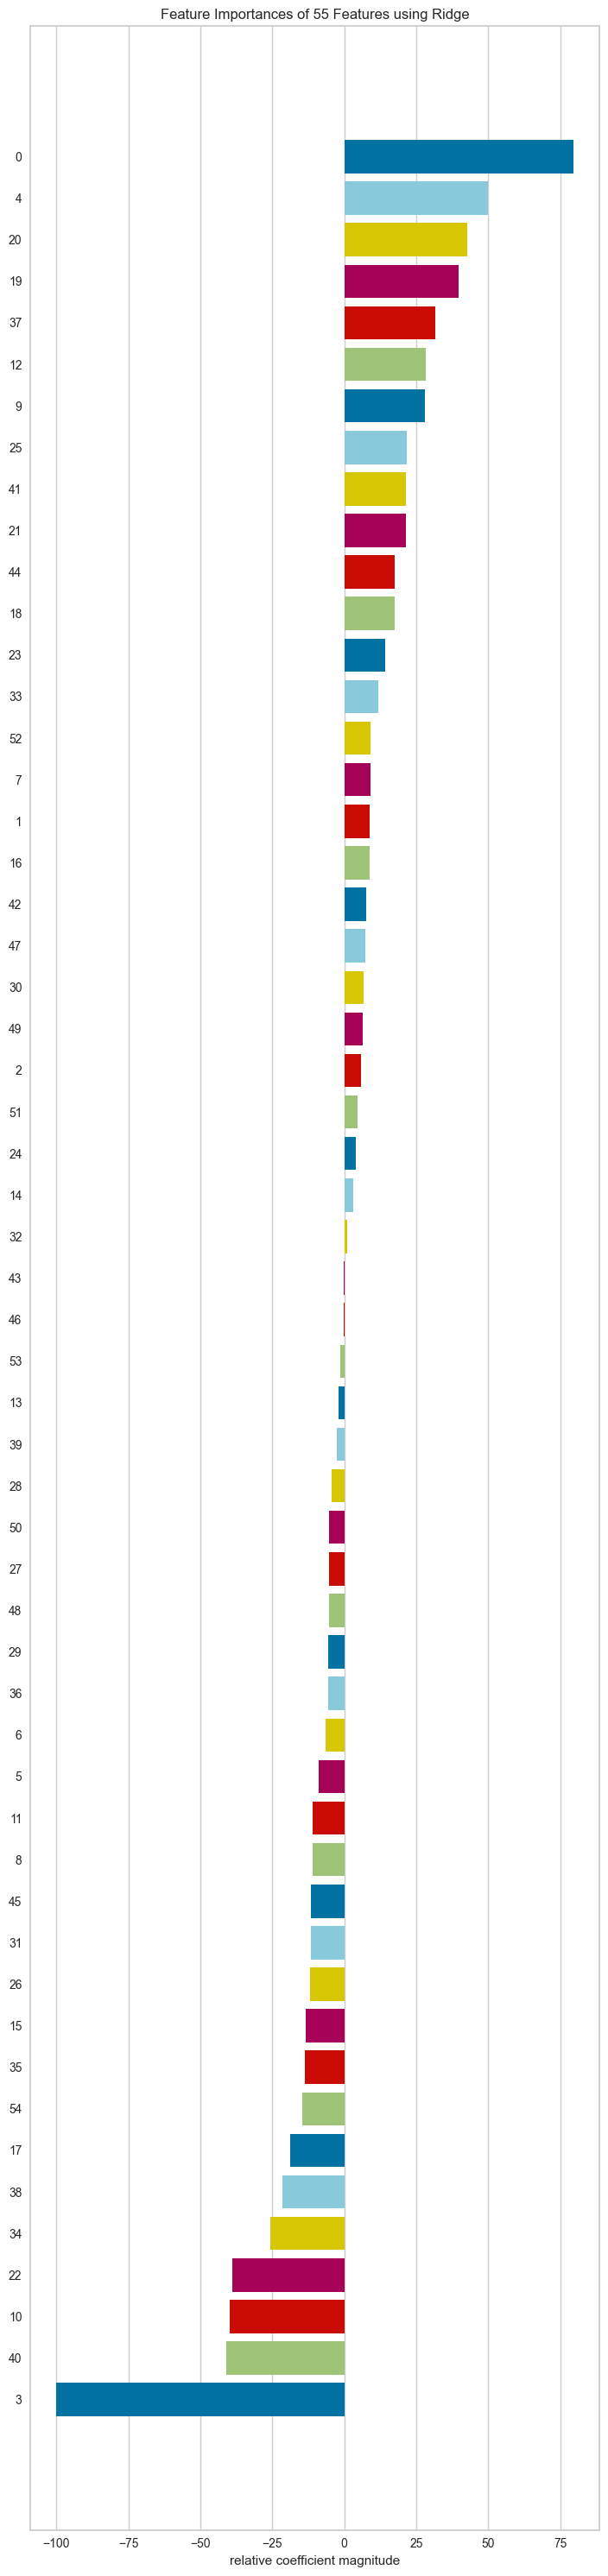

In [ ]:
model = Ridge(alpha=0.02)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# With the FeatureImportances function from the Yellowbrick library, we can rank features by their importance or perform feature selection.
# For the Ridge model, we pass the model with the best-performing alpha hyperparameter (alpha=0.02) into the FeatureImportances function.
# As labels, we provide the column names of the dataframe.

# After our model completes training on the training data, we generate the visualization using the viz.show() command.
# Since our model is a Ridge model, we can only group the features as important or unimportant here, but we cannot perform feature selection.

# The command visualizer = RadViz(size=(720, 3000)) is used just to adjust the size of the visualization.
# By changing the numbers 720 and 3000, you can observe changes in the visual output.

## Feature importances with Lasso

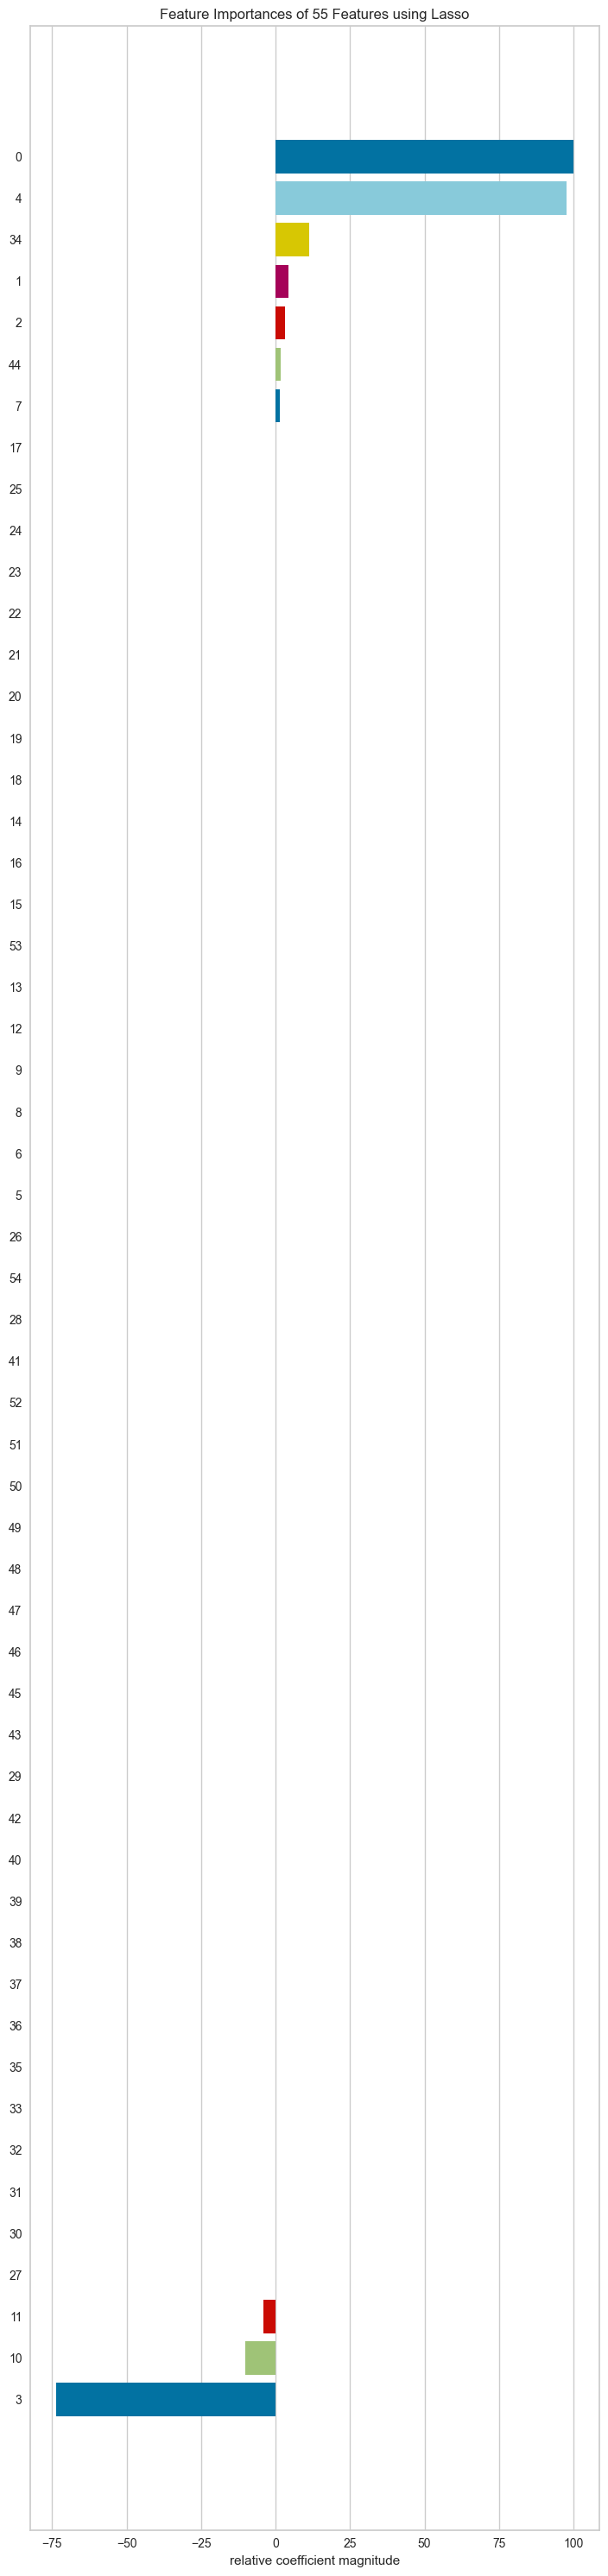

In [ ]:
model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# For the Lasso model, we pass the model with the best-performing alpha hyperparameter (alpha=0.01) into the FeatureImportances function.
# As labels, we provide the column names of the dataframe.

# We can perform feature selection using Lasso.


## Feature Selection

In [121]:
X_new = pd.DataFrame(poly_features)[[0, 3, 4]]
X_new

# Choosing the most important 3 features based on the above visualization and assigning them to the variable X_new.

,0,3,4
0,230.1,52946.01,8697.78
1,44.5,1980.25,1748.85
2,17.2,295.84,789.48
3,151.5,22952.25,6256.95
4,180.8,32688.64,1952.64
...,...,...,...
195,38.2,1459.24,141.34
196,94.2,8873.64,461.58
197,177.0,31329.00,1646.10
198,283.6,80428.96,11911.20


In [122]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.3, random_state=101)

# We can also use the same train_test_split function to split our new data into train and test sets.

In [123]:
scaler_new = StandardScaler()
X_train_scaled2 = scaler_new.fit_transform(X_train2)
X_test_scaled2 = scaler_new.transform(X_test2)

# We scale the train set first and then apply the same scaling to the test set.

In [124]:
lasso_model2 = Lasso(alpha=0.01)
lasso_model2.fit(X_train_scaled2, y_train2)
# We fit the Lasso model to the new training data with the selected features.
# We continue to use the same hyperparameters as in the model used for feature selection.

Lasso(alpha=0.01)

In [125]:
y_pred2 = lasso_model2.predict(X_test_scaled2)
y_train_pred2 = lasso_model2.predict(X_train_scaled2)

# We can now evaluate the performance of our new model using the selected features.

In [126]:
train_val(y_train2, y_train_pred2, y_test2, y_pred2, "lasso_new")

# 3 featura göre gayet güzel scorlar elde ettik. Burda overfiting olmadığına dair insightımızı aldık. Teyit işlemini cross validation ile yapacağımızı unutmuyoruz.
# We obtained very good scores based on the 3 features. We confirmed that there is no overfitting. We should not forget that we will perform the confirmation process with cross-validation.

,lasso_new_train,lasso_new_test
R2,0.984226,0.980674
mae,0.420986,0.521575
mse,0.415107,0.545617
rmse,0.644288,0.738659


In [127]:
lgs

,grid_lasso_train,grid_lasso_test
R2,0.988820,0.986283
mae,0.339185,0.441091
mse,0.294202,0.387259
rmse,0.542404,0.622302


In [ ]:
0.738659 / y.mean()  # with  3 feature 

0.052676698163665533

In [129]:
0.622302 / y.mean()  # with 55 feature 

0.04437881975396684